<a href="https://colab.research.google.com/github/gffiveash/DS4002/blob/main/7_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook includes code for cluster analysis, to visualize median sale price grouped by location and by homes sold.

In [ ]:
# Clone to gitub
! git clone https://github.com/gffiveash/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 337, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 337 (delta 75), reused 5 (delta 5), pack-reused 189 (from 1)
Receiving objects: 100% (337/337), 3.60 MiB | 12.62 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import matplotlib.patches as mpatches


In [ ]:
df = pd.read_csv('DS4002/DATA/Merged_Final_Data.csv')

df.head()
print(df.columns)

Index(['Date', 'Location', 'Median Sale Price', 'Median Sale Price MoM',
       'Median Sale Price YoY', 'Homes Sold', 'Homes Sold MoM',
       'Homes Sold YoY'],
      dtype='object')


In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Month and Season
df['Month'] = df['Date'].dt.month
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
seasonal_data = df.groupby('Season').agg({
    'Median Sale Price': 'mean',
    'Homes Sold': 'mean'
}).reset_index()


In [ ]:

print(df.columns)

Index(['Date', 'Location', 'Median Sale Price', 'Median Sale Price MoM',
       'Median Sale Price YoY', 'Homes Sold', 'Homes Sold MoM',
       'Homes Sold YoY', 'Month', 'Season'],
      dtype='object')


In [ ]:
def apply_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(data[['Median Sale Price']])
    return data

# Apply K-Means Clustering (choosing 3 clusters for simplicity)
neighborhood_clusters = apply_kmeans(neighborhood_prices, 3)
season_clusters = apply_kmeans(seasonal_prices, 3)


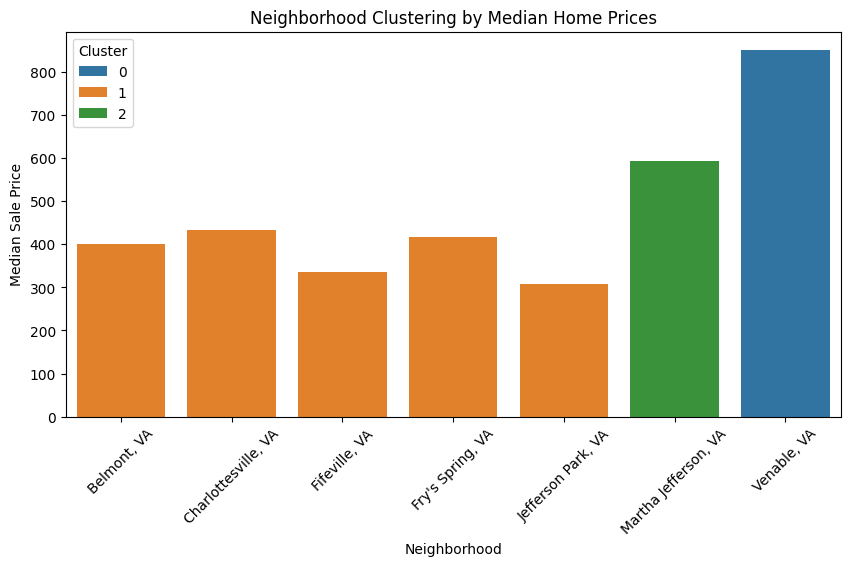

<Figure size 640x480 with 0 Axes>

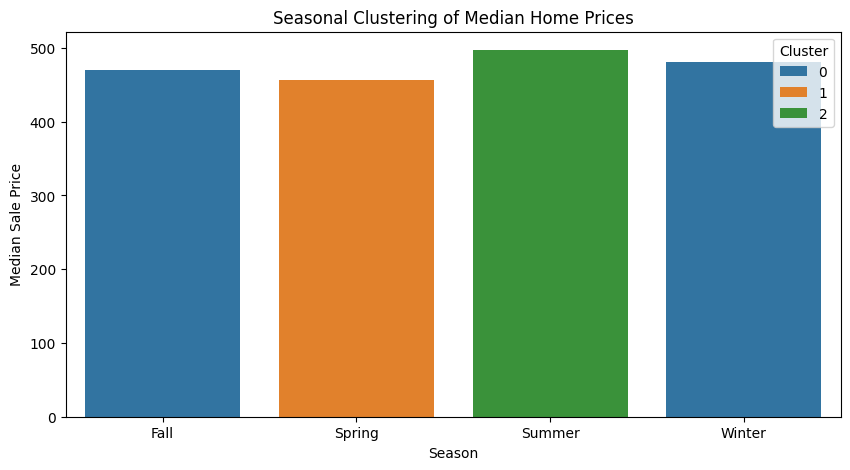

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=neighborhood_clusters, x='Location', y='Median Sale Price', hue='Cluster', palette='tab10')
plt.xticks(rotation=45)
plt.title("Neighborhood Clustering by Median Home Prices")
plt.xlabel("Neighborhood")
plt.ylabel("Median Sale Price")
plt.legend(title="Cluster")
plt.show()
plt.clf()  # Clears the figure

plt.figure(figsize=(10, 5))
sns.barplot(data=season_clusters, x='Season', y='Median Sale Price', hue='Cluster', palette='tab10')
plt.title("Seasonal Clustering of Median Home Prices")
plt.xlabel("Season")
plt.ylabel("Median Sale Price")
plt.legend(title="Cluster")
plt.show()
plt.clf()  # Clears the figure


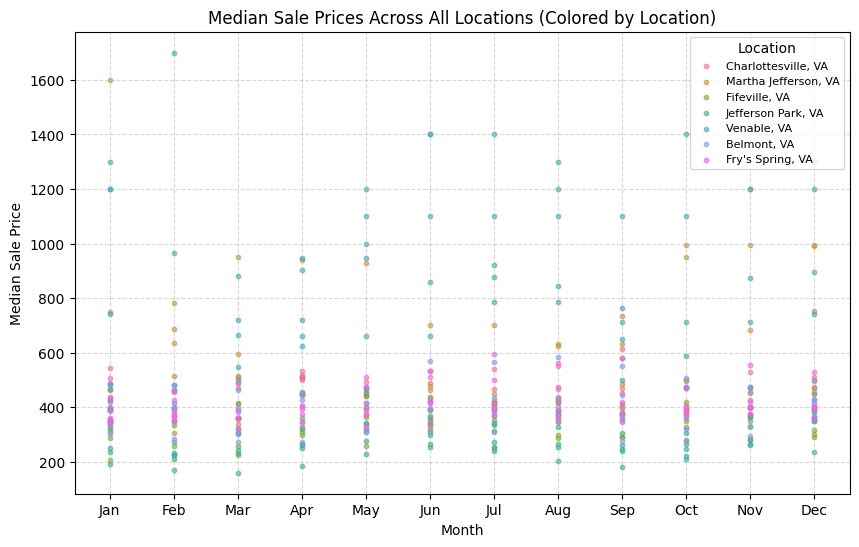

In [ ]:

# Ensure necessary columns are present
required_columns = ["Date", "Location", "Median Sale Price"]
 # Keep only relevant columns and drop missing values

# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract Month
df["Month"] = df["Date"].dt.month

# Reduce dataset size for efficient rendering (randomly sample 1000 points)
sample_size = 1000
df_sample = df.sample(n=sample_size, random_state=42) if len(df) > sample_size else df

# Get unique locations and assign colors dynamically
unique_locations = df_sample["Location"].unique()
num_colors = len(unique_locations)
palette = sns.color_palette("husl", num_colors)

# Create a dictionary mapping locations to colors
location_color_map = {location: palette[i] for i, location in enumerate(unique_locations)}

# Create scatter plot using Matplotlib
plt.figure(figsize=(10, 6))

# Scatter plot with colors based on location
for location in unique_locations:
    subset = df_sample[df_sample["Location"] == location]
    plt.scatter(subset["Month"], subset["Median Sale Price"],
                color=location_color_map[location], s=10, alpha=0.6, label=location)

# Improve readability
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Median Sale Price")
plt.title("Median Sale Prices Across All Locations (Colored by Location)")

# Add a legend (limit to first 10 locations for readability)
if len(unique_locations) > 10:
    handles = [mpatches.Patch(color=location_color_map[loc], label=loc) for loc in unique_locations[:10]]
    plt.legend(handles=handles, title="Location (First 10 Shown)", loc="upper right", fontsize=8)
else:
    plt.legend(title="Location", loc="upper right", fontsize=8)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
print(df.columns.tolist())

['Date', 'Location', 'Median Sale Price', 'Median Sale Price MoM', 'Median Sale Price YoY', 'Homes Sold', 'Homes Sold MoM', 'Homes Sold YoY', 'Month', 'Season']


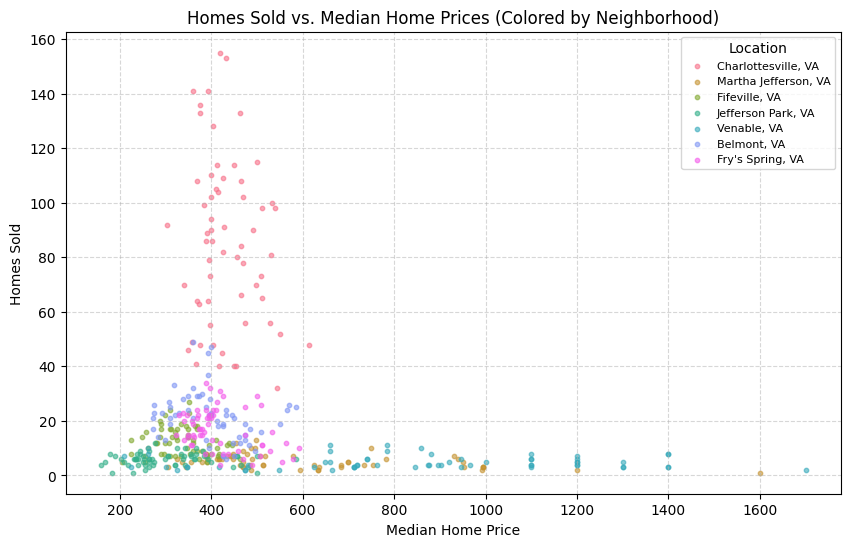

In [ ]:
required_columns = ["Homes Sold","Date", "Location", "Median Sale Price"]

# Convert 'Date' to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract Month
df["Month"] = df["Date"].dt.month

# Reduce dataset size for efficient rendering (randomly sample 1000 points)
sample_size = 1000
df_sample = df.sample(n=sample_size, random_state=42) if len(df) > sample_size else df
unique_locations = df_sample["Location"].unique()
num_colors = len(unique_locations)
palette = sns.color_palette("husl", num_colors)

# Create a dictionary mapping locations to colors
location_color_map = {location: palette[i] for i, location in enumerate(unique_locations)}

# Create scatter plot using Matplotlib
plt.figure(figsize=(10, 6))

# Scatter plot with colors based on location
for location in unique_locations:
    subset = df_sample[df_sample["Location"] == location]
    plt.scatter(subset["Median Sale Price"], subset["Homes Sold"],
                color=location_color_map[location], s=10, alpha=0.6, label=location)

# Improve readability
plt.xlabel("Median Home Price")
plt.ylabel("Homes Sold")
plt.title("Homes Sold vs. Median Home Prices (Colored by Neighborhood)")

# Add a legend (limit to first 10 locations for readability)
if len(unique_locations) > 10:
    handles = [mpatches.Patch(color=location_color_map[loc], label=loc) for loc in unique_locations[:10]]
    plt.legend(handles=handles, title="Location (First 10 Shown)", loc="upper right", fontsize=8)
else:
    plt.legend(title="Location", loc="upper right", fontsize=8)

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
# Get unique locations and assign colors dynamically
